### Importing Data

In [1]:
import pandas as pd
digital = pd.read_csv('data/appliances/DataSurvey.csv')
region = pd.read_excel('data/appliances/region.xlsx'
                            ,sheet_name='region')

### Adding 'region' Feature

In [2]:
import numpy as np
digital['code_region'] = np.floor(digital['VILLE']/10000)
digital = pd.merge(digital, region, how='left', left_on='code_region', right_on='code')

### Data Visualization

In [3]:
def Camembert(feature, angle):
    VarGroupby = digital.groupby([feature], as_index=False, sort=False)['VILLE'].count()
    VarGroupby.columns = [feature,'NOMBRE']
    import matplotlib.pyplot as plt
    plt.pie(VarGroupby['NOMBRE'], labels=VarGroupby[feature], autopct='%1.1f%%', shadow=True, startangle=angle)
    plt.axis('equal')
    plt.show()
    
    

In [4]:
Camembert('SEXE', 60)

<Figure size 640x480 with 1 Axes>

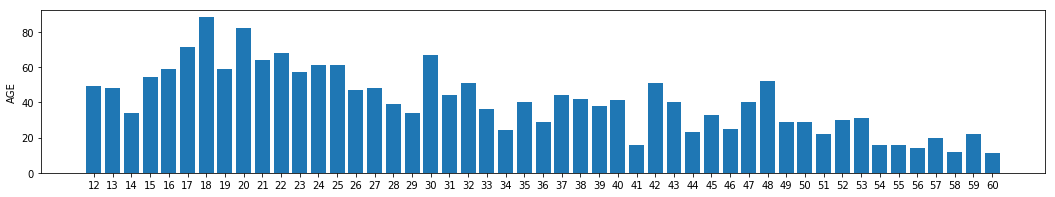

In [5]:
import matplotlib.pyplot as plt
VarGroupby = digital.groupby(['AGE'], as_index=False, sort=True)['VILLE'].count()
VarGroupby.columns = ['AGE','NOMBRE']
plt.figure(figsize=(18,3))
plt.bar(VarGroupby.index, VarGroupby['NOMBRE'], align='center', alpha=1)
plt.xticks(VarGroupby.index, VarGroupby['AGE'])
plt.ylabel('AGE')
plt.show()

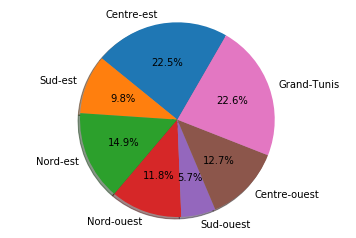

In [6]:
Camembert('region', 60)

### Exploration and Data Preparation

In [7]:
digital.info()
digital.region.value_counts().sort_index()
digital.NIV_INSTRUCTION.value_counts().sort_index()
digital.SEXE.value_counts().sort_index()
digital.PROFESSION.value_counts().sort_index()
digital.NIV_INSTRUCTION_DU_CHEF.value_counts().sort_index()
digital.REVENU_MENSUEL.value_counts().sort_index()
digital.NB_ENFANTS.describe()
digital.AGE.describe()
digital.isnull().sum() #missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 0 to 2010
Data columns (total 48 columns):
AGE                          2011 non-null int64
SEXE                         2010 non-null object
VILLE                        2011 non-null int64
PROFESSION                   2008 non-null object
NIV_INSTRUCTION              2010 non-null object
ETAT_CIVIL                   2009 non-null object
AUTRE_ETAT                   20 non-null float64
ID_CHEF_MENAGE               2009 non-null object
MOI                          508 non-null object
PROF_CHEF_MENAGE             1472 non-null object
NIV_INSTRUCTION_DU_CHEF      1439 non-null object
REVENU_MENSUEL               2008 non-null object
NB_ENFANTS                   1951 non-null float64
SITUATION_DU_LOGEMENT        2011 non-null object
TYPE_LOGEMENT                2007 non-null object
NB_ETAGE                     1191 non-null float64
TV_CLASSIQUE                 1576 non-null object
TV_LCD                       542 non-null obj

AGE                             0
SEXE                            1
VILLE                           0
PROFESSION                      3
NIV_INSTRUCTION                 1
ETAT_CIVIL                      2
AUTRE_ETAT                   1991
ID_CHEF_MENAGE                  2
MOI                          1503
PROF_CHEF_MENAGE              539
NIV_INSTRUCTION_DU_CHEF       572
REVENU_MENSUEL                  3
NB_ENFANTS                     60
SITUATION_DU_LOGEMENT           0
TYPE_LOGEMENT                   4
NB_ETAGE                      820
TV_CLASSIQUE                  435
TV_LCD                       1469
RECEPTEUR_ANA                1914
RECEPTEUR_NUMERIQ             130
DREAM_BOX                    1741
LECTEUR_DVD                   987
PC_BUREAU                    1198
PC_PORTABLE                  1124
CONNEXION_INTERNET            996
CAMESCOPE                    1576
APPAREIL_PHOTO_NUMERIQUE     1299
CONSOLE_JEUX                 1662
MACHINE_LAVER_AUTOMATIQUE     928
MACHINE_LAVER_

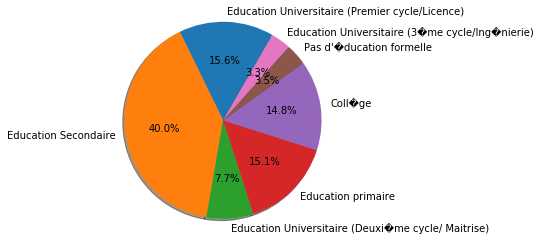

In [8]:
digital[['NIV_INSTRUCTION','NIV_INSTRUCTION_DU_CHEF']].isnull().sum() #missing values #chef="chef ménage" meaning householder
Camembert('NIV_INSTRUCTION', 60)

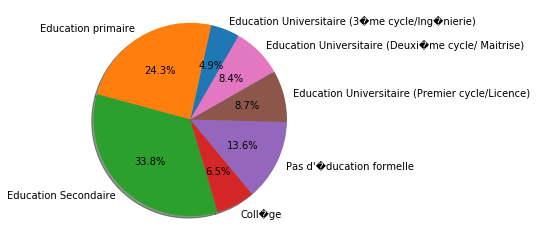

In [9]:
Camembert('NIV_INSTRUCTION_DU_CHEF', 60)

In [10]:
digital.NIV_INSTRUCTION_DU_CHEF.isnull().sum() #missing values
digital.NIV_INSTRUCTION.isnull().sum() #missing values

1

In [11]:
digital['NIV_INSTRUCTION_DU_CHEF'] = np.where(digital.NIV_INSTRUCTION_DU_CHEF.isnull(), digital['NIV_INSTRUCTION'],digital['NIV_INSTRUCTION_DU_CHEF'])

### Creating and Mapping Feature "NIV_INSTRUCTION_DU_CHEF_RET"

In [12]:
digital['NIV_INSTRUCTION_DU_CHEF_RET'] = np.where(digital['NIV_INSTRUCTION_DU_CHEF'] == "Pas d'�ducation formelle", 1, np.nan)
digital['NIV_INSTRUCTION_DU_CHEF_RET'] = np.where(digital['NIV_INSTRUCTION_DU_CHEF'] == "Education primaire", 2,digital['NIV_INSTRUCTION_DU_CHEF_RET'])
digital['NIV_INSTRUCTION_DU_CHEF_RET'] = np.where(digital['NIV_INSTRUCTION_DU_CHEF'] == "Coll�ge", 3,digital['NIV_INSTRUCTION_DU_CHEF_RET'])
digital['NIV_INSTRUCTION_DU_CHEF_RET'] = np.where(digital['NIV_INSTRUCTION_DU_CHEF'] == "Education Secondaire", 4,digital['NIV_INSTRUCTION_DU_CHEF_RET'])
digital['NIV_INSTRUCTION_DU_CHEF_RET'] = np.where(digital['NIV_INSTRUCTION_DU_CHEF'] == "Education Universitaire (Premier cycle/Licence)", 5,digital['NIV_INSTRUCTION_DU_CHEF_RET'])
digital['NIV_INSTRUCTION_DU_CHEF_RET'] = np.where(digital['NIV_INSTRUCTION_DU_CHEF'] == "Education Universitaire (Deuxi�me cycle/ Maitrise)", 6,digital['NIV_INSTRUCTION_DU_CHEF_RET'])
digital['NIV_INSTRUCTION_DU_CHEF_RET'] = np.where(digital['NIV_INSTRUCTION_DU_CHEF'] == "Education Universitaire (3�me cycle/Ing�nierie)", 7,digital['NIV_INSTRUCTION_DU_CHEF_RET'])
digital.NIV_INSTRUCTION_DU_CHEF_RET.isnull().sum() #missing values (should be equal to zero now)
digital.REVENU_MENSUEL.value_counts().sort_index()

1801 < R < 3000    226
251 < R < 450      327
451 < R < 650      464
651 < R < 1800     872
NSP/Refus           13
R < 250             70
R > 3001            36
Name: REVENU_MENSUEL, dtype: int64

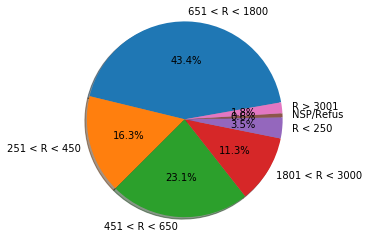

In [13]:
digital[['REVENU_MENSUEL']].isnull().sum()
Camembert('REVENU_MENSUEL', 10)

### Creating and Mapping Feature "REVENU_MENSUEL"

In [14]:
list(digital)
digital.NIV_INSTRUCTION_DU_CHEF.isnull().sum() #valeurs manquantes
digital.REVENU_MENSUEL.value_counts().sort_index()
digital['REVENU_MENSUEL_RET'] = np.where(digital['REVENU_MENSUEL'] == "R < 250", 125, np.nan)
digital['REVENU_MENSUEL_RET'] = np.where(digital['REVENU_MENSUEL'] == "251 < R < 450", 350,digital['REVENU_MENSUEL_RET'])
digital['REVENU_MENSUEL_RET'] = np.where(digital['REVENU_MENSUEL'] == "451 < R < 650", 550,digital['REVENU_MENSUEL_RET'])
digital['REVENU_MENSUEL_RET'] = np.where(digital['REVENU_MENSUEL'] == "651 < R < 1800", 1225,digital['REVENU_MENSUEL_RET'])
digital['REVENU_MENSUEL_RET'] = np.where(digital['REVENU_MENSUEL'] == "1801 < R < 3000", 2400,digital['REVENU_MENSUEL_RET'])
digital['REVENU_MENSUEL_RET'] = np.where(digital['REVENU_MENSUEL'] == "R > 3001", 3600,digital['REVENU_MENSUEL_RET'])

### Creating Feature "Score"

/home/ahmed/anaconda3/envs/RLearning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/ahmed/anaconda3/envs/RLearning/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ahmed/anaconda3/envs/RLearning/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 0 to 2010
Data columns (total 16 columns):
TV_CLASSIQUE                 1576 non-null object
TV_LCD                       542 non-null object
RECEPTEUR_ANA                97 non-null object
RECEPTEUR_NUMERIQ            1881 non-null object
DREAM_BOX                    270 non-null object
LECTEUR_DVD                  1024 non-null object
PC_BUREAU                    813 non-null object
PC_PORTABLE                  887 non-null object
CONNEXION_INTERNET           1015 non-null object
CAMESCOPE                    435 non-null object
APPAREIL_PHOTO_NUMERIQUE     712 non-null object
CONSOLE_JEUX                 349 non-null object
MACHINE_LAVER_AUTOMATIQUE    1083 non-null object
MACHINE_LAVER_SEMI_AUTO      675 non-null object
LAVE_VAISSELLE               83 non-null object
CLIMATISEUR                  873 non-null object
dtypes: object(16)
memory usage: 267.1+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7f08d7d2c7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f08d7de8320>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f08d7d2cf60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f08d7ed4c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f08d7ed42b0>],
 'means': []}

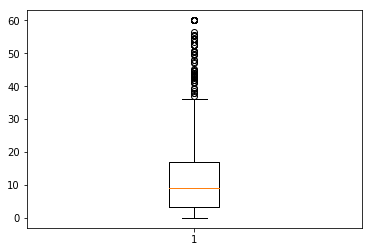

In [15]:
list(digital)
digital.ix[:,'TV_CLASSIQUE':'CLIMATISEUR'].info()
RetScore1 = digital.ix[:,'TV_CLASSIQUE':'CLIMATISEUR'].notnull().sum(axis=0) # Number of equipments
RetScore1 = pd.DataFrame(RetScore1)
RetScore1.columns = ['SCORE_EQUIPEMENT']
RetScore1['SCORE_EQUIPEMENT'] = len(digital) / RetScore1['SCORE_EQUIPEMENT']
# Dropping Redundant Equipments
RetScore1 = RetScore1.drop(['TV_CLASSIQUE','PC_BUREAU','MACHINE_LAVER_SEMI_AUTO','RECEPTEUR_ANA'],axis=0)
# Concatenation of equipments variable
RetScore2 = pd.DataFrame([])
for i in RetScore1.index:
    table = digital[[i]]
    table[[i]] = np.where(table[[i]] == 'Oui', i, 0)
    table.columns = ['EQUIPEMENT']
    table['ID'] = table.index
    RetScore2 = pd.concat([RetScore2,table])
# Affectation de score pour chaque individu
RetScore3 = pd.merge(RetScore2, RetScore1, how='left', left_on='EQUIPEMENT', right_index=True)
RetScore4 = RetScore3.groupby(['ID'], as_index=False)[['SCORE_EQUIPEMENT']].sum()

RetScore4.SCORE_EQUIPEMENT.describe()
import matplotlib.pyplot as plt
plt.boxplot(RetScore4.SCORE_EQUIPEMENT)

### Selecting Segmentation Features

In [16]:
Donnees_CSP = digital[['NIV_INSTRUCTION_DU_CHEF_RET','REVENU_MENSUEL_RET']]
Donnees_CSP = pd.merge(Donnees_CSP, RetScore4, how='left', left_index=True, right_on = 'ID')
Donnees_CSP = Donnees_CSP.drop(['ID'],axis=1)
Donnees_CSP.columns = ['NIV_INSTRUCTION_DU_CHEF','REVENU_MENSUEL','SCORE_EQUIPEMENT']

In [17]:
Donnees_CSP = Donnees_CSP.dropna()
Donnees_CSP = Donnees_CSP.reset_index(drop=True)

In [18]:
### Correlation

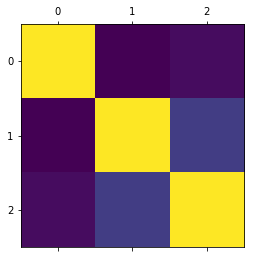

In [19]:
Donnees_CSP.corr()
plt.matshow(Donnees_CSP.corr()) #the darker the less correlated.

## Segmenting the Population

### Data Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Donnees_CSP)
CSPScaler = scaler.transform(Donnees_CSP)

## 1.Hierarchical Classification

In [21]:
from scipy import cluster
Z = cluster.hierarchy.ward(CSPScaler)

### Dendrogram

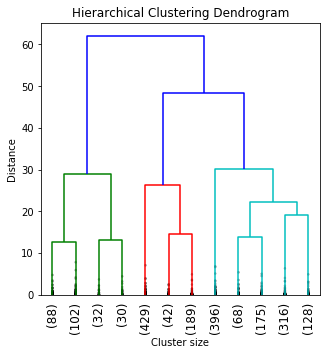

In [23]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(5, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [24]:
cutree = cluster.hierarchy.cut_tree(Z, n_clusters=3) #choosing number of classes

#### Assigining Individuals to Classes

In [25]:
cutree = pd.DataFrame(cutree,columns=['SEGMENT'])
frames = [Donnees_CSP, cutree]
CSPresultatClfH = pd.concat(frames, axis=1)
list(CSPresultatClfH)
CSPresultatClfH.columns = ['NIV_INSTRUCTION','REVENU','SCORE_EQUIPEMENT','SEGMENT']

In [40]:
def graphe3D(table):
    import pandas as pd
    import numpy as np
    #%matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines
    from mpl_toolkits.mplot3d import Axes3D
    from IPython import get_ipython
    import seaborn as sns
    Y = table['SEGMENT']
    X = table.drop(['SEGMENT'],axis=1)
    x = 'NIV_INSTRUCTION'
    y = 'REVENU'
    z = 'SCORE_EQUIPEMENT'
    limit = len(table)
    sns.reset_orig() # prevent seaborn from over-riding mplot3d defaults
    
    fig = plt.figure(figsize = (9, 9))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(X.loc[Y == 0, x][:limit], X.loc[Y == 0, y][:limit], \
       X.loc[Y == 0, z][:limit], c = 'b', marker = '.', s = 10, label = 'seg0')
    ax.scatter(X.loc[Y == 1, x][:limit], X.loc[Y == 1, y][:limit], \
       X.loc[Y == 1, z][:limit], c = 'r', marker = '.', s = 10, label = 'seg1')
    ax.scatter(X.loc[Y == 2, x][:limit], X.loc[Y == 2, y][:limit], \
       X.loc[Y == 2, z][:limit], c = 'y', marker = '.', s = 10, label = 'seg2')
    
    ax.set_xlabel(x, size = 16); 
    ax.set_ylabel(y, size = 16); 
    ax.set_zlabel(z, size = 16)
    ax.set_title('Classes Representaion', size = 16)
    
    plt.axis('tight')
    ax.grid(1)
    
    seg0 = mlines.Line2D([], [], linewidth = 0, color='b', marker='.',markersize = 10, label='seg0')
    seg1 = mlines.Line2D([], [], linewidth = 0, color='r', marker='.',markersize = 10, label='seg1')
    seg2 = mlines.Line2D([], [], linewidth = 0, color='y', marker='.',markersize = 10, label='seg2')
    
    plt.legend(handles = [seg0, seg1, seg2],bbox_to_anchor = (1, 0.5 ), frameon = False, prop={'size': 16},title="Segments");

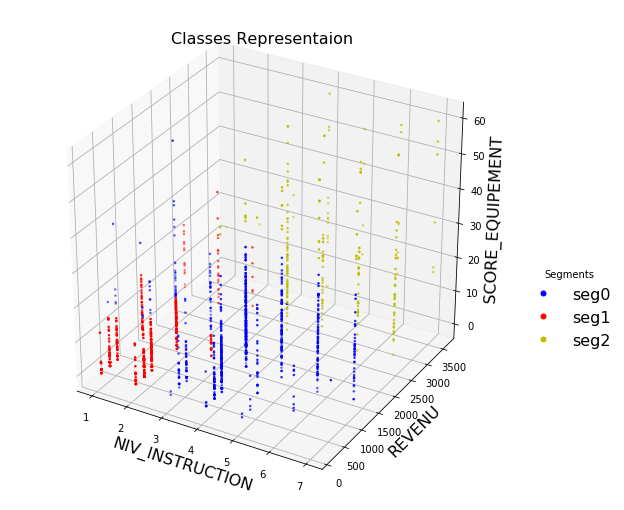

In [41]:
graphe3D(CSPresultatClfH) # 3D visualization

In [44]:
from sklearn import metrics
metrics.silhouette_score(CSPScaler,cutree)  #measuring clustering consistency.

/home/ahmed/anaconda3/envs/RLearning/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3302035267209706

## KMeans

### Choosing the number of classes using silhouette metric

[0.38843648 1.         2.         3.         4.         5.
 6.         7.         8.        ]
[0.38843648 0.34851877 2.         3.         4.         5.
 6.         7.         8.        ]
[0.38843648 0.34851877 0.37629252 3.         4.         5.
 6.         7.         8.        ]
[0.38843648 0.34851877 0.37629252 0.33400914 4.         5.
 6.         7.         8.        ]
[0.38843648 0.34851877 0.37629252 0.33400914 0.36514684 5.
 6.         7.         8.        ]
[0.38843648 0.34851877 0.37629252 0.33400914 0.36514684 0.39128574
 6.         7.         8.        ]
[0.38843648 0.34851877 0.37629252 0.33400914 0.36514684 0.39128574
 0.4063992  7.         8.        ]
[0.38843648 0.34851877 0.37629252 0.33400914 0.36514684 0.39128574
 0.4063992  0.40749733 8.        ]
[0.38843648 0.34851877 0.37629252 0.33400914 0.36514684 0.39128574
 0.4063992  0.40749733 0.4108257 ]


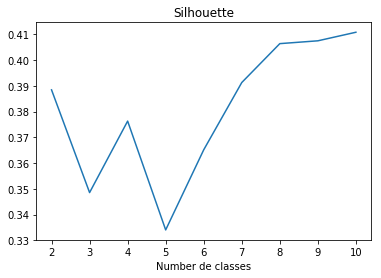

In [56]:
from sklearn import cluster
from sklearn import metrics
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km=cluster.KMeans(n_clusters=k+2)
    km.fit(CSPScaler)
    res[k] = metrics.silhouette_score(CSPScaler,km.labels_)
    print(res)
# best number of classes (Silhouette )
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("Number de classes")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [57]:
km=cluster.KMeans(n_clusters=3)
km.fit(CSPScaler)
labels = km.predict(CSPScaler)

### Assigning Individuals to Clusters

In [59]:
labels= pd.DataFrame(labels,columns=['SEGMENT'])
frames = [Donnees_CSP, labels]
CSPresultatKm = pd.concat(frames, axis=1)
list(CSPresultatKm)
CSPresultatKm.columns = ['NIV_INSTRUCTION','REVENU','SCORE_EQUIPEMENT','SEGMENT']

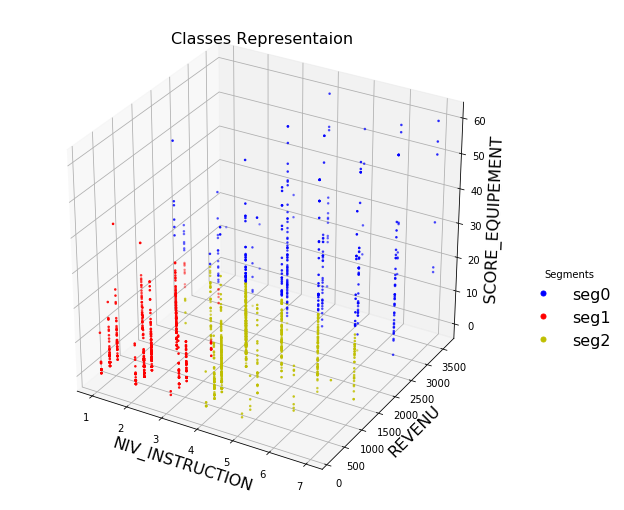

In [60]:
graphe3D(CSPresultatKm)

In [62]:
from sklearn import metrics
metrics.silhouette_score(CSPScaler,labels)

/home/ahmed/anaconda3/envs/RLearning/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.34851876995053327

## Decision Tree

In [63]:
X = CSPresultatClfH[['NIV_INSTRUCTION','REVENU','SCORE_EQUIPEMENT']]
Y = CSPresultatClfH['SEGMENT']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100,stratify = Y)

In [66]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 5)
clf.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
y_pred = clf.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print ("Precision : \n",accuracy_score(y_test,y_pred)*100)
print("Report : \n",classification_report(y_test, y_pred))

Confusion Matrix: 
 [[325   0   0]
 [ 11 187   0]
 [  1   0  75]]
Precision : 
 97.9966611018364
Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       325
           1       1.00      0.94      0.97       198
           2       1.00      0.99      0.99        76

   micro avg       0.98      0.98      0.98       599
   macro avg       0.99      0.98      0.98       599
weighted avg       0.98      0.98      0.98       599



In [72]:
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf,feature_names=list(X_train.columns), out_file=dot_data,filled=True, rounded=True,special_characters=True)
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Tree.png")

True

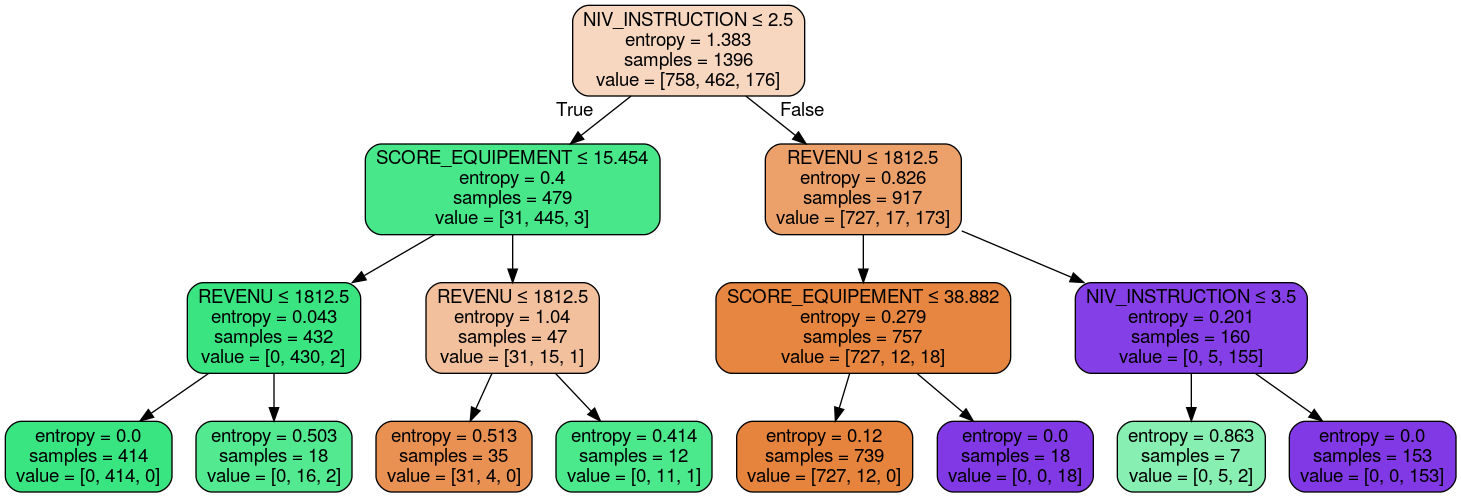

In [73]:
from IPython.display import Image  
Image(graph.create_png())

In [74]:
Synthesis = pd.DataFrame(y_pred)

## Neural Network

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(30,30),activation='logistic',random_state=100000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/home/ahmed/anaconda3/envs/RLearning/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [77]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Matrice de confusion: \n",confusion_matrix(y_test, y_pred))
print ("Précision classement : \n",accuracy_score(y_test,y_pred)*100)
print("Report : \n",classification_report(y_test, y_pred))

Matrice de confusion: 
 [[315   9   1]
 [  5 191   2]
 [  3   0  73]]
Précision classement : 
 96.661101836394
Report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       325
           1       0.95      0.96      0.96       198
           2       0.96      0.96      0.96        76

   micro avg       0.97      0.97      0.97       599
   macro avg       0.96      0.96      0.96       599
weighted avg       0.97      0.97      0.97       599



In [78]:
Synthesis = pd.merge(Synthesis, pd.DataFrame(y_pred), left_index=True, right_index=True)

## Support Vector Machine

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
from sklearn import svm
clf = svm.SVC(C=100,kernel='poly',random_state=1000000)
clf.fit(X_train, y_train) 

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=1000000,
  shrinking=True, tol=0.001, verbose=False)

In [81]:
y_pred = clf.predict(X_test)

In [82]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Matrice de confusion: \n",confusion_matrix(y_test, y_pred))
print ("Précision classement : \n",accuracy_score(y_test,y_pred)*100)
print("Report : \n",classification_report(y_test, y_pred))

Matrice de confusion: 
 [[322   2   1]
 [  5 193   0]
 [  1   0  75]]
Précision classement : 
 98.49749582637729
Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       325
           1       0.99      0.97      0.98       198
           2       0.99      0.99      0.99        76

   micro avg       0.98      0.98      0.98       599
   macro avg       0.99      0.98      0.99       599
weighted avg       0.99      0.98      0.98       599



In [84]:
Synthesis = pd.merge(Synthesis, pd.DataFrame(y_pred), left_index=True, right_index=True)

# Combining the Different Predictive Models

In [86]:
Synthesis.columns = ['Tree','NN','SVM']
Synthesis['mode'] = Synthesis.mode(axis=1)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Matrice de confusion: \n",confusion_matrix(y_test, Synthesis['mode']))
print ("Précision classement : \n",accuracy_score(y_test,Synthesis['mode'])*100)
print("Report : \n",classification_report(y_test, Synthesis['mode']))


Matrice de confusion: 
 [[322   2   1]
 [  4 194   0]
 [  1   0  75]]
Précision classement : 
 98.6644407345576
Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       325
           1       0.99      0.98      0.98       198
           2       0.99      0.99      0.99        76

   micro avg       0.99      0.99      0.99       599
   macro avg       0.99      0.99      0.99       599
weighted avg       0.99      0.99      0.99       599

